In [2]:
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as md
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Tlist=[1.5,1,0.9,0.8,0.7,0.65,0.6,0.55,0.5,0.475]
N=[10000,50000,150000,150000,180000,350000,1000000,3000000,10000000,30000000]
Trajectories=[]
for i in range(len(Tlist)):
    traj = md.Universe(f"kalj_T{Tlist[i]}_n360_v300_{N[i]}_1.lammpstrj", f'kalj_T{Tlist[i]}_n360_v300_prod_{N[i]}_1.unwrap.dcd', topology_format="LAMMPSDUMP")
    #print(f'kalj_T{T}_n360_v300_50000_1.lammpstrj')
    Trajectories.append(traj)

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


In [34]:
rdf11s=[]
rdf22s=[]
rdf12s=[]
for i in range(len(Trajectories)):
    ag1=Trajectories[i].select_atoms("type 1")
    ag2=Trajectories[i].select_atoms("type 2")
    rdf11=rdf.InterRDF(ag1,ag1,nbins=100,range=(0.1,10))
    rdf11.run()
    rdf12=rdf.InterRDF(ag1,ag2,nbins=100,range=(0.1,10))
    rdf12.run()
    rdf22=rdf.InterRDF(ag2,ag2,nbins=100,range=(0.1,10))
    rdf22.run()
    rdf11s.append(rdf11)
    rdf12s.append(rdf12)
    rdf22s.append(rdf22)
    

Text(0, 0.5, 'g(r)')

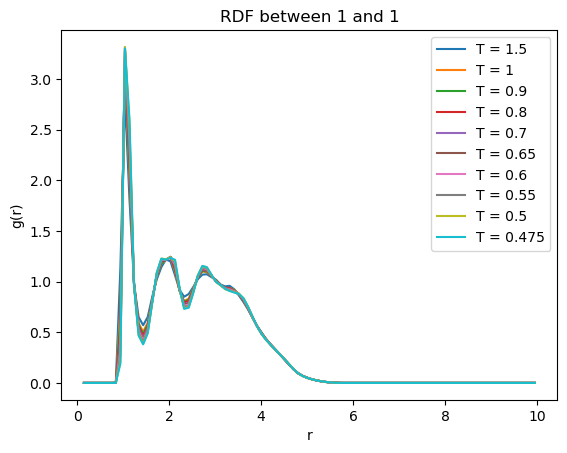

In [35]:
fig,ax=plt.subplots()
for i in range(len(Tlist)):
    ax.plot(rdf11s[i].bins,rdf11s[i].results.rdf,label=f'T = {Tlist[i]}')
plt.legend()
ax.set_title('RDF between 1 and 1')
ax.set_xlabel("r")
ax.set_ylabel('g(r)')

Text(0, 0.5, 'g(r)')

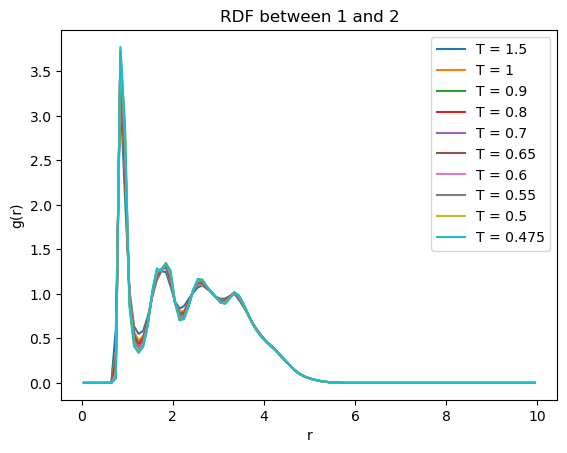

In [8]:
fig,ax=plt.subplots()
for i in range(len(Tlist)):
    ax.plot(rdf12s[i].bins,rdf12s[i].results.rdf,label=f'T = {Tlist[i]}')
plt.legend()
ax.set_title('RDF between 1 and 2')
ax.set_xlabel("r")
ax.set_ylabel('g(r)')

Text(0, 0.5, 'g(r)')

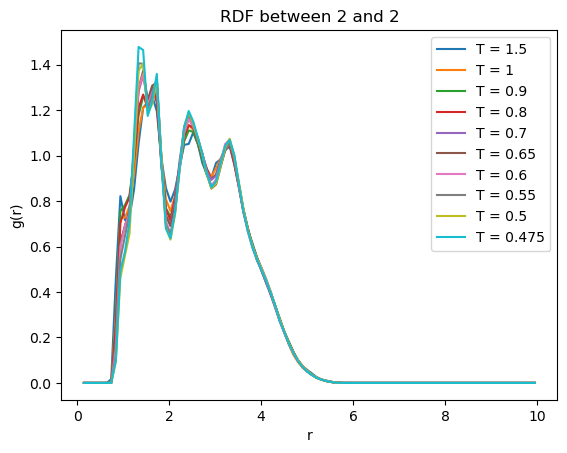

In [36]:
fig,ax=plt.subplots()
for i in range(len(Tlist)):
    ax.plot(rdf22s[i].bins,rdf22s[i].results.rdf,label=f'T = {Tlist[i]}')
plt.legend()
ax.set_title('RDF between 2 and 2')
ax.set_xlabel("r")
ax.set_ylabel('g(r)')

In [37]:
MSDs=[]
for i in range(len(Tlist)):
    MSD=msd.EinsteinMSD(Trajectories[i],select='type 1',msd_type='xyz',fft=True)
    MSD.run()
    MSDs.append(MSD)

/state/partition1/job-27209908/ipykernel_1631059/3558820645.py:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(frames),np.log(MSDs[i].results.timeseries),label=f'T = {Tlist[i]}')
/state/partition1/job-27209908/ipykernel_1631059/3558820645.py:4: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(frames),np.log(MSDs[i].results.timeseries),label=f'T = {Tlist[i]}')


Text(0, 0.5, 'log(MSD)')

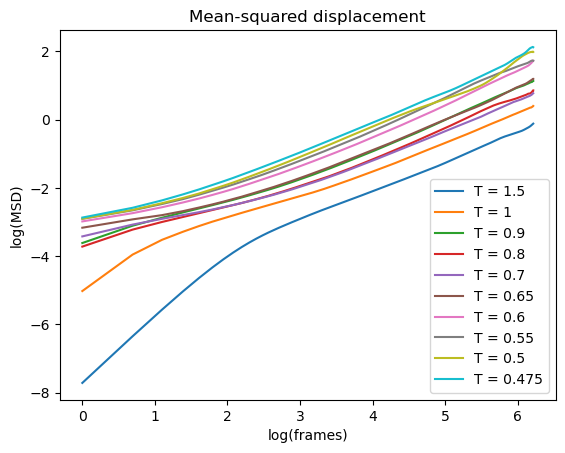

In [38]:
fig,ax=plt.subplots()
for i in range(len(Tlist)):
    frames=np.arange(MSDs[i].n_frames)
    ax.plot(np.log(frames),np.log(MSDs[i].results.timeseries),label=f'T = {Tlist[i]}')
plt.legend()
ax.set_title('Mean-squared displacement')
ax.set_xlabel('log(frames)')
ax.set_ylabel('log(MSD)')

In [42]:
def findOne(L):
    devi=1000
    loc=-1
    for i in range(501):
        if abs(L[i]-1)<devi:
            devi=abs(L[i]-1)
            loc=i
    return loc

Text(0, 0.5, 'log(1/T)')

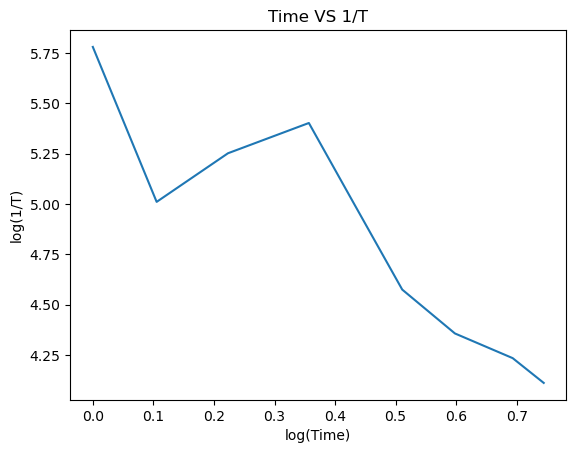

In [46]:
oneOverT=[]
times=[]
for i in range(1,len(Tlist)):
    time=findOne(MSDs[i].results.timeseries)
    times.append(time)
    oneOverT.append(1/Tlist[i])
fig,ax=plt.subplots()
ax.plot(np.log(oneOverT),np.log(times))
ax.set_title('Time VS 1/T')
ax.set_xlabel('log(Time)')
ax.set_ylabel('log(1/T)')